In [0]:
import warnings
import cv2 as cv
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import convert_image_dtype, resize
import matplotlib.pyplot as plt

In [0]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
warnings.filterwarnings('ignore')

In [0]:
# import os
# import tarfile
# from urllib import request

# path = '/content/sample_data/imagenette2.tar'
# request.urlretrieve('https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz',
#                     path)
# tar = tarfile.open(path)
# tar.extractall('/content/sample_data')
# tar.close()
# os.remove(path)

In [11]:
BATCH_SIZE = 128
TARGET = (227, 227)
path_to_data = '/content/sample_data/imagenette2'
path_to_train = path_to_data + '/train'
path_to_val = path_to_data + '/val'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(path_to_train, 
                                     target_size = TARGET,
                                     batch_size=BATCH_SIZE, 
                                     class_mode='sparse',
                                     shuffle=True)
val_generator = val_datagen.flow_from_directory(path_to_val, 
                                 target_size = TARGET,  
                                 batch_size=BATCH_SIZE, 
                                 class_mode='sparse',
                                 shuffle=True)

# for more details, see https://jkjung-avt.github.io/keras-image-cropping/
# def random_crop(img, random_crop_size):
#     # Note: image_data_format is 'channel_last'
#     assert img.shape[2] == 3
#     height, width = img.shape[0], img.shape[1]
#     dy, dx = random_crop_size
#     x = np.random.randint(0, width - dx + 1)
#     y = np.random.randint(0, height - dy + 1)
#     return img[y:(y+dy), x:(x+dx), :]


# def crop_generator(batches, crop_length):
#     """Take as input a Keras ImageGen (Iterator) and generate random
#     crops from the image batches generated by the original iterator.
#     """
#     while True:
#         batch_x, batch_y = next(batches)
#         batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
#         for i in range(batch_x.shape[0]):
#             batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
#         yield (batch_crops, batch_y)

# train_crops = crop_generator(train_generator, 227)
# val_crops = crop_generator(val_generator, 227)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


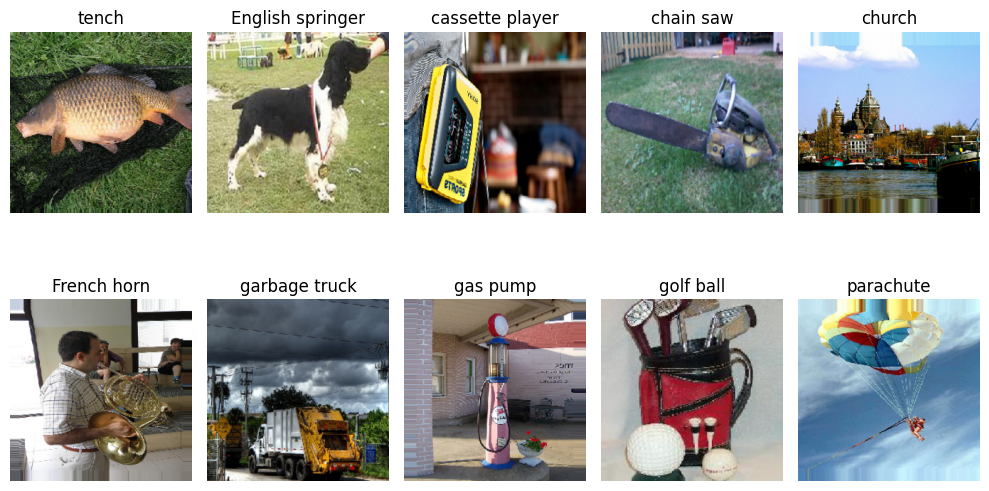

In [4]:
single_batch, labels = train_generator.next()

keys = np.arange(0, 10)
values = ["tench", "English springer", "cassette player", 
          "chain saw", "church", "French horn", "garbage truck", 
          "gas pump", "golf ball", "parachute"]
num_to_label = dict(zip(keys, values))

mapping = {} # label-> num in batch
for i in np.unique(labels):
  mapping[int(i)] = np.where(labels == i)[0][0]

for num, idx in mapping.items():
    plt.subplot(2, 5, num + 1)
    plt.imshow(single_batch[idx,:,:,:])
    plt.axis('off')
    plt.title(num_to_label[num])
    
plt.tight_layout()
plt.show()

AlexNet has the following architecture:
1. **Convolutional layer**: 96 filters of size [11x11x3], zero padding of 3, stride 4.
*   ReLU nonlinearity
*   Response normalization (not used)
*   Max (overlapping) pooling of size 3x3 and stride 2

2. **Convolutional layer**: 256 filters of size [5x5x96], zero padding of 2, stride 2.
*   ReLU nonlinearity
*   Response normalization (not used)
*   Max (overlapping) pooling of size 3x3 and stride 2

3. **Convolutional layer**: 384 filters of size [3x3x256], zero padding of 2, stride 2.
*   ReLU nonlinearity

4. **Convolutional layer**: 384 filters of size [3x3x384], zero padding of 2, stride 2.
*   ReLU nonlinearity

5. **Convolutional layer**: 256 filters of size [3x3x384], zero padding of 2, stride 2.
*   ReLU nonlinearity
*   Max (overlapping) pooling of size 3x3 and stride 2

6. **Fully-connected layer**: 4096 units.
*   ReLU nonlinearity
*   Dropout (0.5)

7. **Fully-connected layer**: 4096 units.
*   ReLU nonlinearity
*   Dropout (0.5)

8. **Fully-connected layer**: 10 units (This net would be train on ImageNette, which has only 10 unique labels).
*   Softmax

All weights in each layers are initialized from zero-mean Gaussian distribution with standard deviation of 0.01.
Biases in the second, fourth, fifth conv layers and in the fully-connected hidden layers are initialized with 1. In remaining layers with 0.











In [0]:
def AlexNet_init(input_shape, num_classes):
  model = None

  initializer = tf.keras.initializers.RandomNormal(stddev=0.01)

  model = tf.keras.Sequential()
  # 1st layer (conv)
  model.add(layers.Conv2D(96, (11, 11), 
                          activation='relu',
                          padding='valid', strides=(4, 4),
                          kernel_initializer=initializer,
                          input_shape=input_shape))
  model.add(layers.MaxPool2D((3, 3), 2, padding='valid'))
  # 2nd layer (conv)
  model.add(layers.Conv2D(256, (5, 5), activation='relu',
                          padding='same', strides=(1, 1), 
                          kernel_initializer=initializer,
                          bias_initializer='ones'))            
  model.add(layers.MaxPool2D((3, 3), 2, padding='valid'))
  # 3d layer (conv)
  model.add(layers.Conv2D(384, (3, 3), activation='relu', 
                          padding='same', strides=(1, 1),
                          kernel_initializer=initializer))
  # 4th layer (conv)
  model.add(layers.Conv2D(384, (3, 3), activation='relu', 
                          padding='same', strides=(1, 1),
                          kernel_initializer=initializer,
                          bias_initializer='ones'))
  # 5th layer (conv)
  model.add(layers.Conv2D(256, (3, 3), activation='relu',
                          padding='same', strides=(1, 1),
                          kernel_initializer=initializer,
                          bias_initializer='ones'))
  model.add(layers.MaxPool2D((3, 3), 2, padding='valid'))
  # 6th layer (fc)
  model.add(layers.Flatten())
  model.add(layers.Dense(1028, activation='relu',
                         kernel_initializer=initializer, 
                         bias_initializer='ones'))
  model.add(layers.Dropout(0.5))
  # 7th layer (fc)
  model.add(layers.Dense(1028, activation='relu',
                         kernel_initializer=initializer,
                         bias_initializer='ones'))
  model.add(layers.Dropout(0.5))
  # 8th layer (fc)
  model.add(layers.Dense(num_classes, activation='softmax',
                         kernel_initializer=initializer))
  return model

In [18]:
model = AlexNet_init((227,227,3), 10)
sgd = tf.keras.optimizers.SGD(lr=1e-3, decay=5e-4, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 256)      

In [19]:
BATCH_SIZE = 128
TARGET = (227, 227)
path_to_data = '/content/sample_data/imagenette2'
path_to_train = path_to_data + '/train'
path_to_val = path_to_data + '/val'

train_datagen = ImageDataGenerator(
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(path_to_train,
                                     target_size = TARGET,
                                     batch_size=BATCH_SIZE, 
                                     class_mode='sparse',
                                     shuffle=True)

val_generator = val_datagen.flow_from_directory(path_to_val, 
                                 target_size = TARGET,  
                                 batch_size=BATCH_SIZE, 
                                 class_mode='sparse',
                                 shuffle=True)

NUM_EPOCHS = 40
TRAIN_SAMPLES = train_generator.n
VAL_SAMPLES = val_generator.n

model.fit(train_generator, 
          steps_per_epoch=np.ceil(TRAIN_SAMPLES/BATCH_SIZE), 
          validation_data=val_generator, 
          validation_steps=np.ceil(VAL_SAMPLES/BATCH_SIZE),
          epochs=NUM_EPOCHS)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/40
74/74 [==============================] - 165s 2s/step - loss: 2.3369 - sparse_categorical_accuracy: 0.1240 - val_loss: 2.1353 - val_sparse_categorical_accuracy: 0.2583
Epoch 2/40
74/74 [==============================] - 164s 2s/step - loss: 2.1182 - sparse_categorical_accuracy: 0.2303 - val_loss: 1.8904 - val_sparse_categorical_accuracy: 0.3312
Epoch 3/40
74/74 [==============================] - 165s 2s/step - loss: 1.8974 - sparse_categorical_accuracy: 0.3307 - val_loss: 1.6840 - val_sparse_categorical_accuracy: 0.4278
Epoch 4/40
74/74 [==============================] - 167s 2s/step - loss: 1.7471 - sparse_categorical_accuracy: 0.3909 - val_loss: 1.6275 - val_sparse_categorical_accuracy: 0.4375
Epoch 5/40
74/74 [==============================] - 168s 2s/step - loss: 1.6472 - sparse_categorical_accuracy: 0.4235 - val_loss: 1.5374 - val_sparse_categorical_accuracy: 0.4713
Epoch 6/40
74/74 [=